In [1]:
import numpy as np
from itertools import *
from pprint import pprint
from scipy import stats

Задача 1
Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. Является ли значимым получившееся уравнение регрессии?

In [2]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [3]:
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

In [4]:
y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

In [5]:
factor = [i for i in range(np.array(X).shape[1])]

In [6]:
fact_x = np.array(X)
fact_x[:, 1, None]

array([[2.30868478],
       [1.30337355],
       [1.82463398],
       [2.67392052],
       [1.97367255],
       [0.77750764],
       [1.81206697],
       [2.26971361],
       [3.17563985],
       [2.87988651]])

In [7]:
ones = np.ones((10,1))

In [8]:

rlist = []
for i in combinations(factor, 2):
    res = {}
    x_pot = np.hstack((ones, fact_x[:, i[0], None], fact_x[:, i[1], None]))
    XTX = x_pot.T.dot(x_pot)
    XTX_inv = np.linalg.inv(XTX)

    b = XTX_inv.dot(x_pot.T).dot(y)
    z = x_pot.dot(b)
    e = y - z

    R = 1 - sum_of_squares(e) / sum_of_squares(np.array(y))
    res = {'c1': i[0], 'c2': i[1], 'R': R}
    rlist.append(res)


pprint(rlist)

[{'R': 0.18113594742585215, 'c1': 0, 'c2': 1},
 {'R': 0.7634246238793151, 'c1': 0, 'c2': 2},
 {'R': 0.4532966783144077, 'c1': 0, 'c2': 3},
 {'R': 0.5479482734039012, 'c1': 1, 'c2': 2},
 {'R': 0.6062055761129934, 'c1': 1, 'c2': 3},
 {'R': 0.622441987650532, 'c1': 2, 'c2': 3}]


In [22]:
R = 0.7634246238793152
R1 = 0.18113594742585215

n = 10
m = 2

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [20]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

In [23]:
F = (R / k1) / ((1 - R1) / k2)
F
# незначим

3.2630400310992473

Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

In [34]:
a_visitor = 2509
a_buy = 77

b_visitor = 1465
b_buy = 60

a_mean = a_visitor / a_buy
b_mean = b_visitor / b_buy


In [35]:
res_a = np.concatenate((np.ones(a_buy), np.zeros(a_visitor-a_buy)), axis=0)
res_b = np.concatenate((np.ones(b_buy), np.zeros(b_visitor-b_buy)), axis=0)
res_a_and_b = np.concatenate((res_a, res_b), axis=0)

In [36]:
res_a_mean = res_a.mean()
res_b_mean = res_b.mean()
res_a_and_b_mean = res_a_and_b.mean()

In [39]:
SS_b = a_visitor * (res_a_mean - res_a_and_b_mean) ** 2 + b_visitor * (res_b_mean - res_a_and_b_mean) ** 2

SS_w = ((res_a - res_a_mean) ** 2).sum() + ((res_b - res_b_mean) ** 2).sum()

SS_b, SS_w

(0.09748158004016791, 132.17956925035745)

In [40]:
k = 2
n = a_visitor + b_visitor

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.03327783717279895)

In [42]:
F = sigma2_b / sigma2_w

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

#стастистически не значимо

3.8438010503414866

Задача 3
Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [43]:
data = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

In [44]:
x1 = np.array(data['x1'])
y1 = np.array(data['y1'])
x2 = np.array(data['x2'])
y2 = np.array(data['y2'])
x3 = np.array(data['x3'])
y3 = np.array(data['y3'])
x4 = np.array(data['x4'])
y4 = np.array(data['y4'])

In [45]:
def prog(x1, y1):
  print(x1.mean())
  print(y1.mean())
  print(x1.var())
  print(y1.var())
  print(np.corrcoef(x1, y1))

  b1 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
  b0 = y1.mean() - b1 * x1.mean()
  print(b1, b0)

  oy = b0 + b1 * x1
  print(oy)

In [46]:
print('x1 y1')
prog(x1, y1)
print('x2 y2')
prog(x2, y2)
print('x3 y3')
prog(x3, y3)
print('x4 y4')
prog(x4, y4)

x1 y1
9.0
7.500909090909093
10.0
3.7520628099173554
[[1.         0.81642052]
 [0.81642052 1.        ]]
0.5000909090909093 3.0000909090909094
[ 8.001       7.00081818  9.50127273  7.50090909  8.50109091 10.00136364
  6.00063636  5.00045455  9.00118182  6.50072727  5.50054545]
x2 y2
9.0
7.50090909090909
10.0
3.752390082644628
[[1.         0.81623651]
 [0.81623651 1.        ]]
0.5000000000000001 3.000909090909089
[ 8.00090909  7.00090909  9.50090909  7.50090909  8.50090909 10.00090909
  6.00090909  5.00090909  9.00090909  6.50090909  5.50090909]
x3 y3
9.0
7.5
10.0
3.747836363636364
[[1.         0.81628674]
 [0.81628674 1.        ]]
0.49972727272727285 3.002454545454544
[7.99972727 7.00027273 9.49890909 7.5        8.49945455 9.99863636
 6.00081818 5.00136364 8.99918182 6.50054545 5.50109091]
x4 y4
9.0
7.500909090909091
10.0
3.7484082644628103
[[1.         0.81652144]
 [0.81652144 1.        ]]
0.49990909090909086 3.0017272727272735
[ 7.001  7.001  7.001  7.001  7.001  7.001  7.001 12.5    7

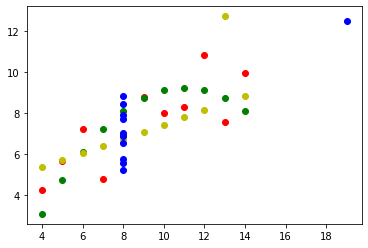

In [47]:
from matplotlib import pyplot as plt

plt.scatter(x1, y1, c='r')
plt.scatter(x2, y2, c='g')
plt.scatter(x3, y3, c='y')
plt.scatter(x4, y4, c='b')